<h1>Теоретический материал – Кластеризация</h1>
Кластеризация — разбиение множества объектов на подмножества,
называемые кластерами. Кластеризация, будучи математическим алгоритм
имеет широкое применение во многих сферах: начиная с таких естественно
научных областей как биология и физиология, и заканчивая маркетингом в
социальных сетях и поисковой оптимизацией. Цель – разделить данные
таким образом, чтобы точки, находящие в одном и том же кластере, были
очень схожи друг с другом, а точки, находящиеся в разных кластерах,
отличались друг от друга. Как и алгоритмы классификации, алгоритмы
кластеризации присваивают (или прогнозируют) каждой точке данных
номер кластера, которому она принадлежит.
Задача кластеризации относится к широкому классу задач обучения
без учителя. Кластеризацию применяют для анализа и поиска признаков по
которым можно объединить объекты, сжатия данных и поиска новизны (что
не входит ни в один кластер) В чем отличие классификации и
кластеризации: при классификации у вас есть набор предопределенных
классов, вы обучаете ИИ на наборе примеров и потом хотите знать, к какому
классу принадлежит новый объект. При кластеризации вы используете
алгоритм, который пытается сгруппировать набор объектов и определить,
существует ли какая-либо взаимосвязь между объектами.
Метод k-средних
Кластеризация k-средних – один из самых простых и наиболее часто
используемых алгоритмов кластеризации. Сначала выбирается число
кластеров k. После выбора значения k алгоритм k-средних отбирает точки,
которые будут представлять центры кластеров (cluster centers). Затем для
каждой точки данных вычисляется его евклидово расстояние до каждого
центра кластера. Каждая точка назначается ближайшему центру кластера.
Алгоритм вычисляет центроиды (centroids) – центры тяжести кластеров.
Каждый центроид – это вектор, элементы которого представляют собой
средние значения характеристик, вычисленные по всем точкам кластера.
Центр кластера смещается в его центроид. Точки заново назначаются
ближайшему центру кластера. Этапы изменения центров кластеров и
переназначения точек итеративно повторяются до тех пор, пока границы
кластеров и расположение центроидов не перестанут изменяться, т.е. на
каждой итерации в каждый кластер будут попадать одни и те же точки
данных.
Алгоритм k-средних, наверное, самый популярный и простой
алгоритм кластеризации и очень легко представляется в виде простого
псевдокода:
1. Выбрать количество кластеров k, которое нам кажется
оптимальным для наших данных.
2. Высыпать случайным образом в пространство наших данных k
точек (центроидов).
3. Для каждой точки нашего набора данных посчитать, к какому
центроиду она ближе.
4. Переместить каждый центроид в центр выборки, которую мы
отнесли к этому центроиду.
5. Повторять последние два шага фиксированное число раз, либо
до тех пор пока центроиды не "сойдутся" (обычно это значит, что их
смещение относительно предыдущего положения не превышает какого-то
заранее заданного небольшого значения).
Стоит заметить, что можно рассчитывать расстояние между
центройдами по любой метрике (Евклидовой, Хемминговой и т.д.).
Сгенерируем 2D-набор данных, содержащий 4 разных больших объекта,
а затем применим алгоритм k-средних, чтобы увидеть результат.

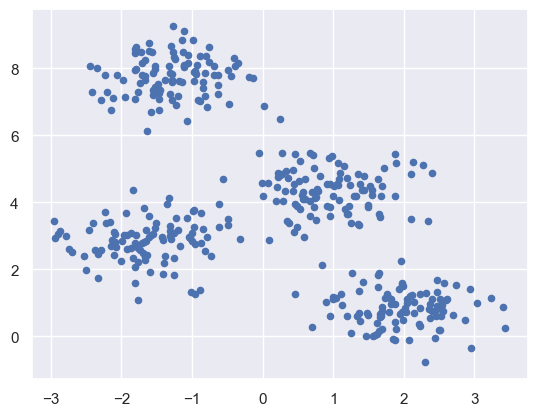

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets._samples_generator import make_blobs

X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], s = 20);
plt.show()

In [4]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_means = kmeans.predict(X)

c:\Users\ivanl\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


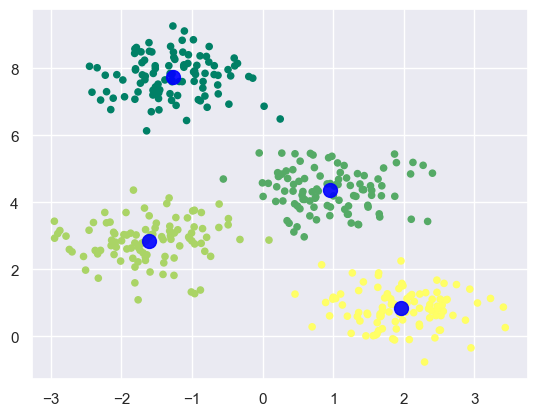

In [5]:
from sklearn.datasets._samples_generator import make_blobs
X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], c = y_means, s = 20, cmap = 'summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha = 0.9);
plt.show()

<h3>1.1.1 Пример
</h3>

In [6]:
# Начнем с импорта необходимых пакетов
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
# загрузим набор цифр из sklearn
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [7]:
kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

c:\Users\ivanl\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 64)

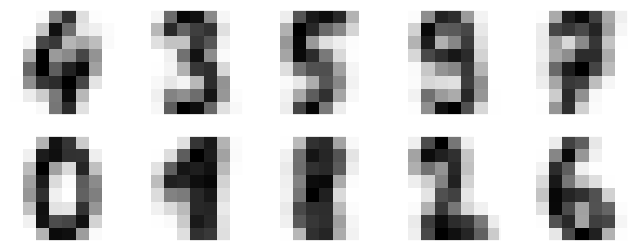

In [8]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

<h3>Задание:</h3>

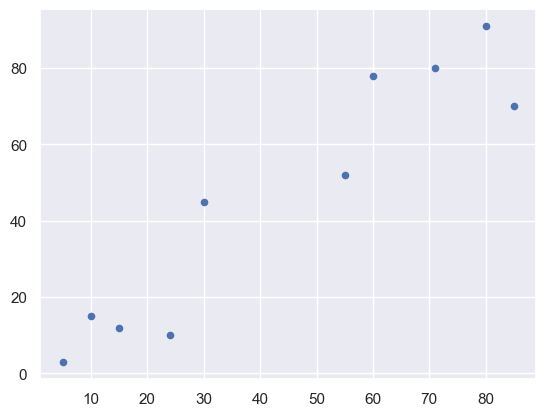

In [10]:
𝑋 = 𝑛𝑝.𝑎𝑟𝑟𝑎𝑦([[5,3],
[10,15],
[15,12],
[24,10],
[30,45],
[85,70],
[71,80],
[60,78],
[55,52],
[80,91],])
plt.scatter(X[:, 0], X[:, 1], s = 20);
plt.show()

In [15]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_means = kmeans.predict(X)

c:\Users\ivanl\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


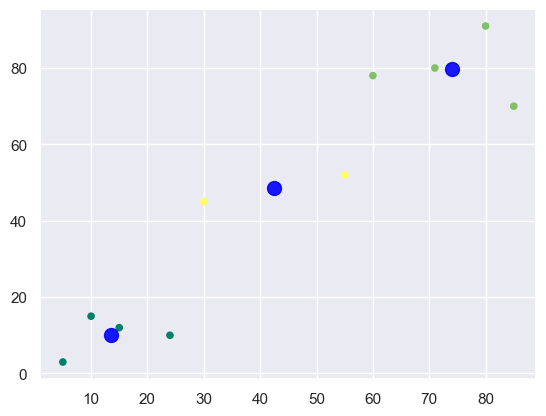

In [16]:
plt.scatter(X[:, 0], X[:, 1], c = y_means, s = 20, cmap = 'summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha = 0.9);

In [17]:
import pandas as pd
url= "iris.csv"
iris_dataframe = pd.read_csv(url)
iris_dataframe.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


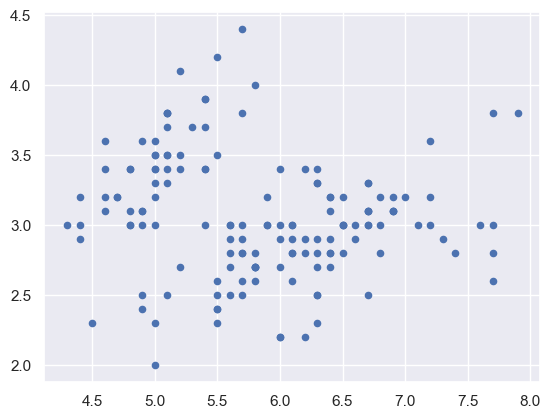

In [63]:
X = iris_dataframe.iloc[:,0:2].values
Y = iris_dataframe.iloc[:,2:4].values

plt.scatter(X[:,0],X[:,1],s = 20);

plt.show()

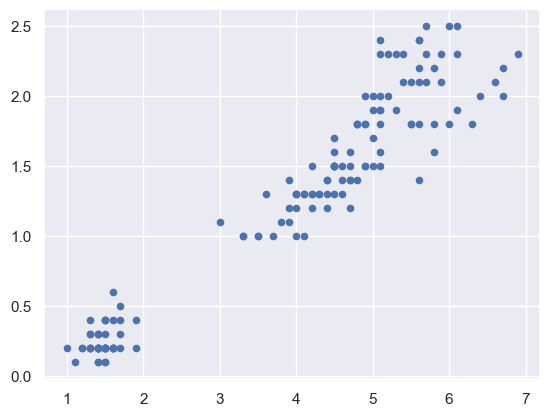

In [62]:
plt.scatter(Y[:,0],Y[:,1],s = 20);

c:\Users\ivanl\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


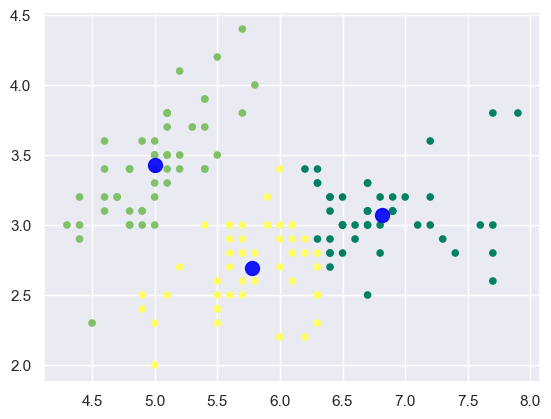

In [67]:
kmeans = KMeans(n_clusters=3)# берем 3 кластера так как в данных всего 3 вида ирисов
kmeans.fit(X)
y_means = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_means, s = 20, cmap = 'summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha = 0.9);

c:\Users\ivanl\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


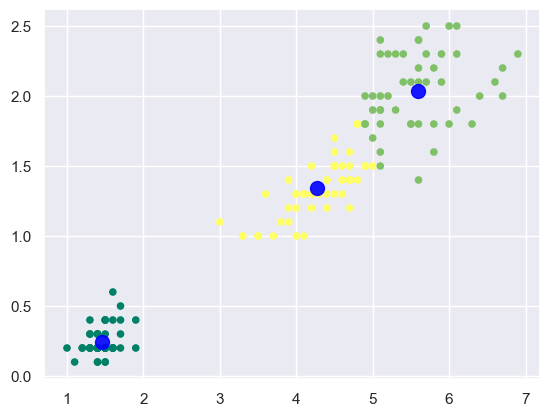

In [68]:
kmeans = KMeans(n_clusters=3)# берем 3 кластера так как в данных всего 3 вида ирисов
kmeans.fit(Y)
y_means = kmeans.predict(Y)
plt.scatter(Y[:, 0], Y[:, 1], c = y_means, s = 20, cmap = 'summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100, alpha = 0.9);

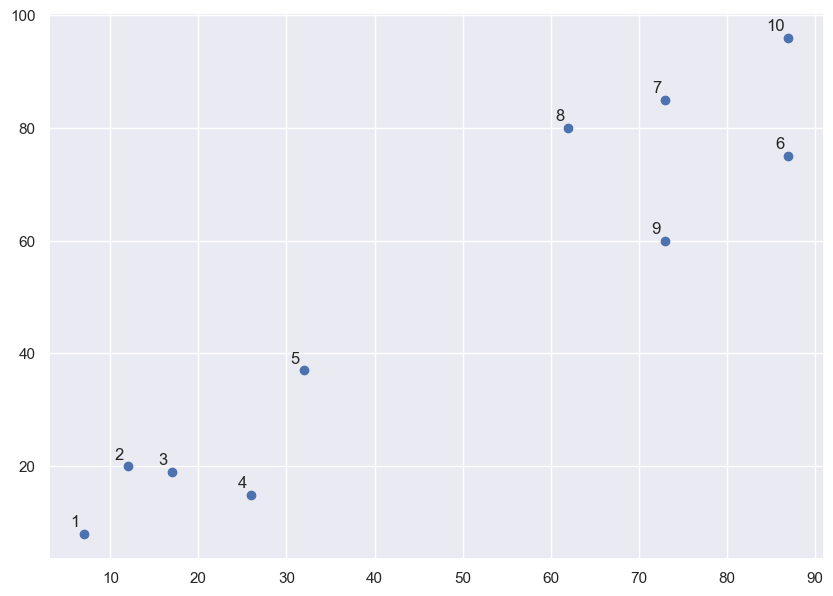

In [70]:
import matplotlib.pyplot as plt
import numpy as np
X = np.array(
    [[7,8], [12,20], [17,19], [26,15], [32,37], [87,75], [73,85], [62,80], [73,60], [87,96],])
labels = range(1, 11)
plt.figure(figsize = (10, 7))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(X[:,0],X[:,1], label = 'True Position')
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,xy = (x, y), xytext = (-3, 3),textcoords = 'offset points', ha = 'right', va = 'bottom')
plt.show()

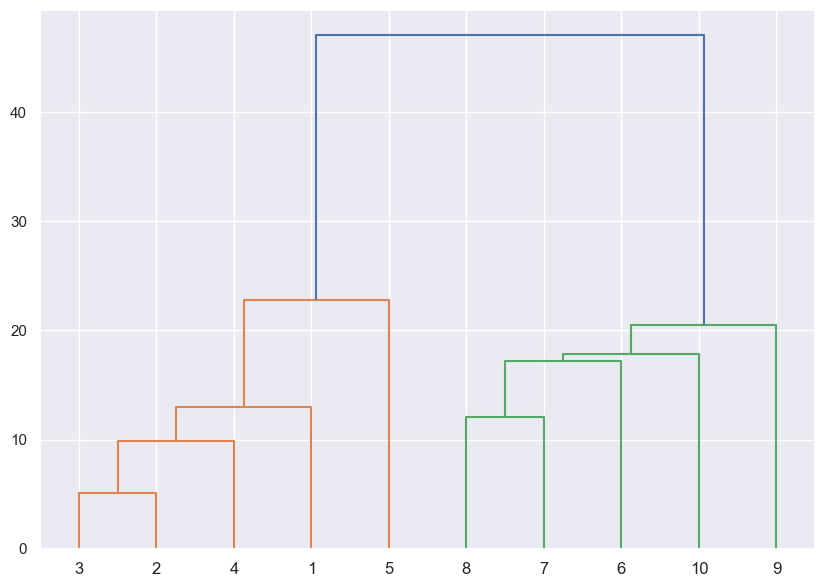

In [72]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(X, 'single')
labelList = range(1, 11)
plt.figure(figsize = (10, 7))
dendrogram(linked, orientation = 'top',labels = labelList,distance_sort ='descending',show_leaf_counts = True)
plt.show()

c:\Users\ivanl\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


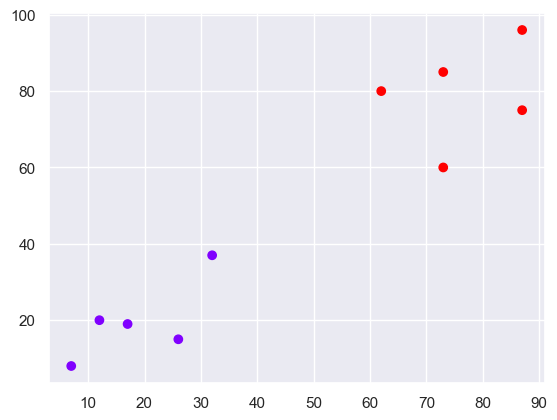

In [74]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c = cluster.labels_, cmap = 'rainbow')

Пример:


In [75]:
import pandas as pd
import numpy as np
url = 'Mall_Customers.csv'
customer_data = pd.read_csv(url)
customer_data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


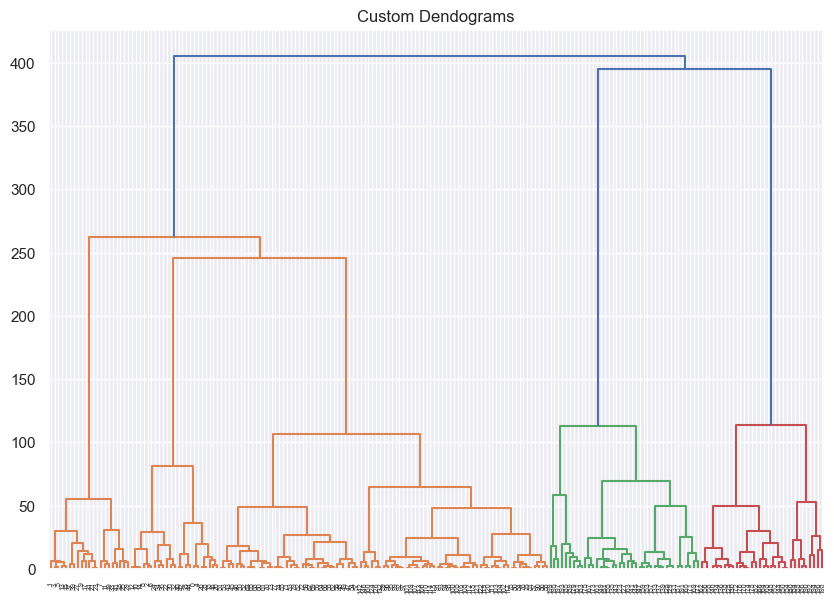

In [76]:
data = customer_data.iloc[:,3:5].values
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("Custom Dendograms")
dend = shc.dendrogram(shc.linkage(data,method='ward'))

In [77]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
cluster.fit_predict(data)

c:\Users\ivanl\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

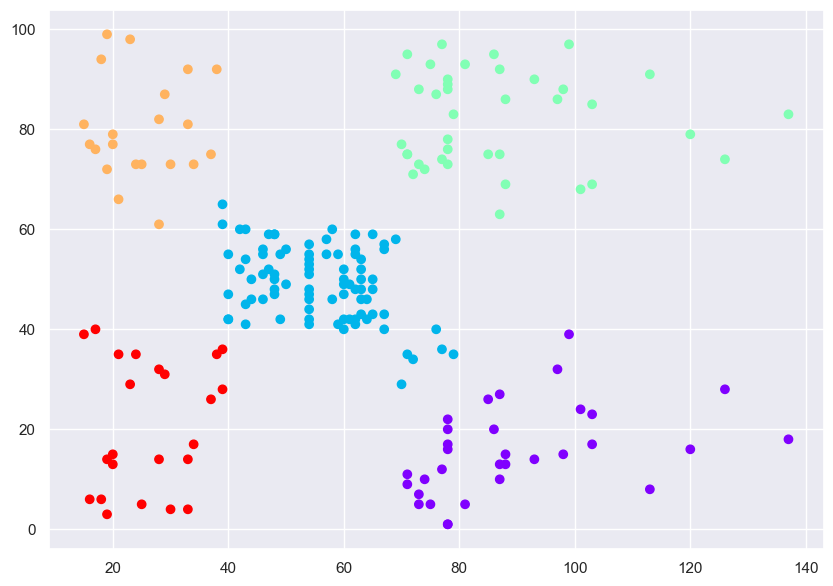

In [78]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0],data[:,1],c=cluster.labels_,cmap='rainbow')

<h3>Задача</h3>
<p>Задание.  Выполните  иерархическую  кластеризацию для  набора  данных  об 
ирисах  Фишера.  При  этом  необходимо  использовать  любые  два  признака 
(всего их четыре). </p>

In [83]:
from sklearn.datasets import load_iris
iris = load_iris()
dataframe = pd.DataFrame(iris.data)
dataframe.columns = iris.feature_names
dataframe


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [104]:
data_iris = dataframe.iloc[:,2:4].values

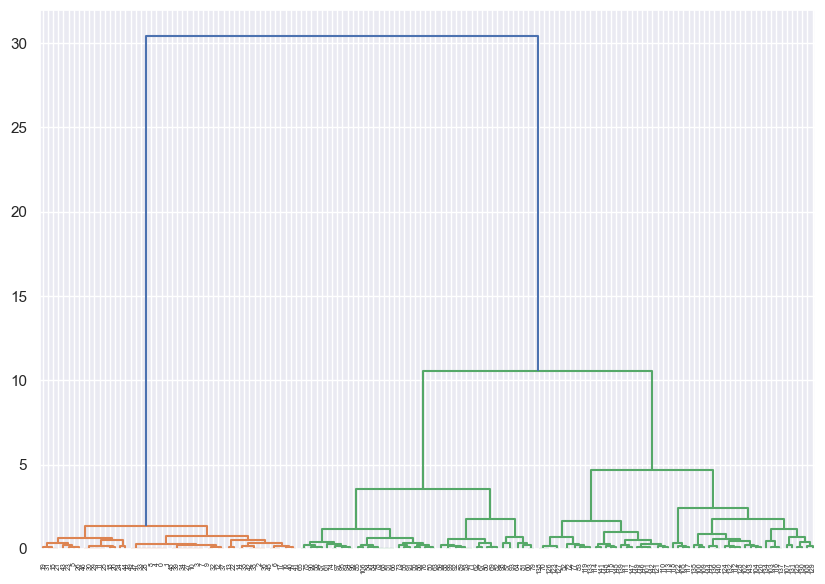

In [105]:
plt.figure(figsize=(10,7))
dend = shc.dendrogram(shc.linkage(data_iris,method='ward'))

In [108]:
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit_predict(data_iris)

c:\Users\ivanl\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

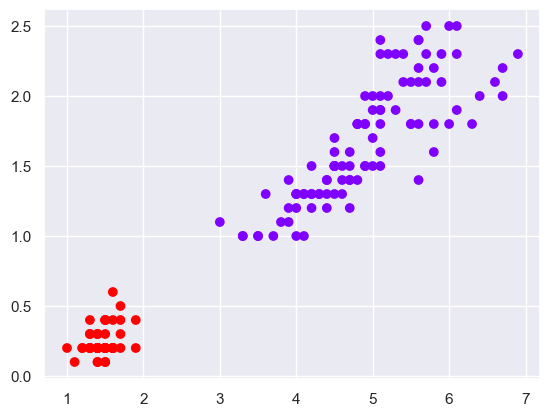

In [109]:
plt.scatter(data[:,0],data[:,1],c=cluster.labels_,cmap="rainbow")